In [153]:
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt

import joblib

In [152]:
df = pd.read_csv("/Users/yehana2002/Projects/DSGP/datasets/processed/final_model_ready_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])

### Training NeuralProphet Model for petrol prices prediction

In [130]:
petrol_df = df[['Date', 'Petrol_Price', 'Crude_Oil_Price', 'Petrol_MA7']].copy()
petrol_df.rename(columns={'Date': 'ds', 'Petrol_Price': 'y'}, inplace=True)

In [131]:
petrol_df.set_index('ds', inplace=True)
petrol_df = petrol_df.resample('MS').mean()
petrol_df.interpolate(method='linear', inplace=True)
petrol_df.dropna(inplace=True)
petrol_df.reset_index(inplace=True)

In [136]:
model_petrol = NeuralProphet(
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    learning_rate=0.01,
    epochs=1000,
    n_lags=6,
    n_forecasts=1
)

model_petrol.add_lagged_regressor('Crude_Oil_Price', n_lags=6)
model_petrol.add_lagged_regressor('Petrol_MA7', n_lags=6)

In [137]:
metrics_petrol = model_petrol.fit(petrol_df, freq='MS')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.743]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Epoch 1000: 100%|██████████| 1000/1000 [00:00<00:00, 30316.84it/s, loss=0.000535, v_num=8, MAE=3.500, RMSE=6.150, Loss=0.000583, RegLoss=0.000]  


In [134]:
future_petrol = model_petrol.make_future_dataframe(petrol_df, periods=3, n_historic_predictions=True)
forecast_petrol = model_petrol.predict(future_petrol)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.743]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.744]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.744]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 37.82it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [135]:
forecast_petrol[['ds', 'yhat1']].tail(10)

,ds,yhat1
380,2024-04-01,453.169617
381,2024-05-01,437.930420
382,2024-06-01,417.097321
383,2024-07-01,408.979706
384,2024-08-01,366.546234
385,2024-09-01,368.747681
386,2024-10-01,376.249725
387,2024-11-01,365.886078
388,2024-12-01,376.758301
389,2025-01-01,372.084351


### Training NeuralProphet Model for diesel price prediction

In [141]:
diesel_df = df[['Date', 'Diesel_Price', 'Crude_Oil_Price', 'Diesel_MA7']].copy()
diesel_df['Date'] = pd.to_datetime(diesel_df['Date'])
diesel_df = diesel_df.rename(columns={'Date': 'ds', 'Diesel_Price': 'y'})

In [142]:
diesel_df = diesel_df.set_index('ds').resample('MS').mean().interpolate(method='linear')
diesel_df = diesel_df.reset_index()

In [143]:
diesel_df.dropna(subset=['y', 'Crude_Oil_Price', 'Diesel_MA7'], inplace=True)

In [144]:
model_diesel = NeuralProphet(
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    learning_rate=0.01,
    epochs=1000,
    n_lags=6,
    n_forecasts=1
)

model_diesel.add_lagged_regressor('Crude_Oil_Price', n_lags=6)
model_diesel.add_lagged_regressor('Diesel_MA7', n_lags=6)

In [145]:
metrics_diesel = model_diesel.fit(diesel_df, freq='MS')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.743]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Epoch 1000: 100%|██████████| 1000/1000 [00:00<00:00, 28361.74it/s, loss=0.000744, v_num=9, MAE=4.220, RMSE=7.330, Loss=0.000934, RegLoss=0.000]  


In [147]:
future_diesel = model_diesel.make_future_dataframe(diesel_df, periods=3, n_historic_predictions=True)
forecast_diesel = model_diesel.predict(future_diesel)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.743]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.744]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.744]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 47.40it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [148]:
forecast_diesel[['ds', 'yhat1']].tail(10)

,ds,yhat1
380,2024-04-01,447.481659
381,2024-05-01,367.005554
382,2024-06-01,363.408386
383,2024-07-01,361.856323
384,2024-08-01,337.112671
385,2024-09-01,368.329407
386,2024-10-01,353.041168
387,2024-11-01,303.394470
388,2024-12-01,317.170044
389,2025-01-01,312.093964


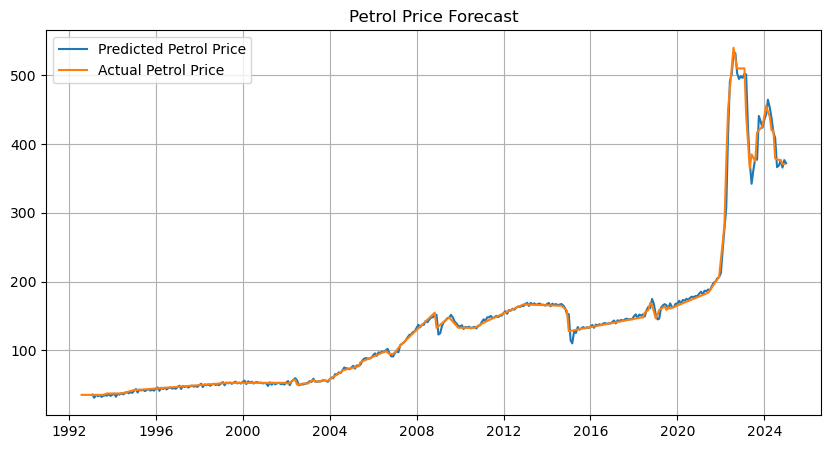

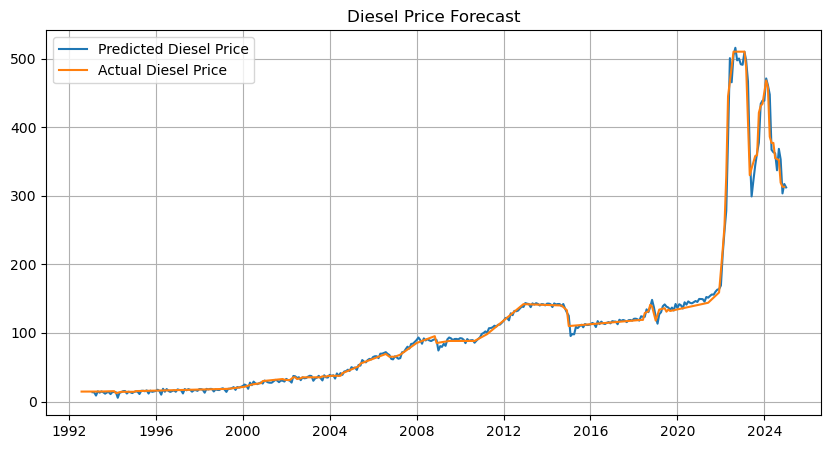

In [149]:
# Visualize Petrol Forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_petrol['ds'], forecast_petrol['yhat1'], label='Predicted Petrol Price')
plt.plot(petrol_df['ds'], petrol_df['y'], label='Actual Petrol Price')
plt.title("Petrol Price Forecast")
plt.legend()
plt.grid(True)
plt.show()

# Visualize Diesel Forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_diesel['ds'], forecast_diesel['yhat1'], label='Predicted Diesel Price')
plt.plot(diesel_df['ds'], diesel_df['y'], label='Actual Diesel Price')
plt.title("Diesel Price Forecast")
plt.legend()
plt.grid(True)
plt.show()


In [156]:
joblib.dump(model_petrol, "/Users/yehana2002/Projects/DSGP/models/petrol_neuralprophet_model.pkl")
joblib.dump(model_diesel, "/Users/yehana2002/Projects/DSGP/models/diesel_neuralprophet_model.pkl")

['/Users/yehana2002/Projects/DSGP/models/diesel_neuralprophet_model.pkl']